In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv


****

**Introduction**
I recently visited Seattle with a number of good friends and had nothing but positive comments about the city. I grew up in the San Francisco/Bay Area all my life and when I stepped foot in Seattle I saw it as a fresh start with exciting new opportunities. In this notebook I will be taking my first step into data science so what better data to explore than with the city that started my curiosity into tech.

I have three questions I want to answer with this dataset. 
1. Where are the most expensive neighbourhoods to rent an AirBnB?
2. How are property types dispersed throughout Seattle?
3. Are there areas of potential opportunities depending on neighbourhoods?

I will try to keep this as informative as possible for other beginner data scientists and programers like myself and will include YouTube tutorials I looked at to aid in this project.

First off let's import the libraries we will need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from decimal import Decimal
import datetime
import folium #Longitude and Lattitude mapping.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #We don't this in the analysis I am currently showing.
from sklearn.linear_model import LinearRegression #We don't this in the analysis I am currently showing.
import seaborn as sns
from itertools import *
import os
import folium
from folium import plugins
from folium.plugins import MarkerCluster #To be able to cluster our individual data points on folium.
from IPython.display import HTML, display



Note: When working with kaggle datasets that are already in the system. Double click the csv files to get the file path of kaggle for the import below. In this case the file path is input and seattle (see below).

In [3]:
calendar = pd.read_csv('../input/seattle/calendar.csv')
listing = pd.read_csv('../input/seattle/listings.csv')
reviews = pd.read_csv('../input/seattle/reviews.csv')

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


There are a number of NaN values in the calendar and reviews dataset. I will just drop them using the drop method. Usually I would only drop columns that are irrelevant to the analysis and replace NaN values with the mean or mode of the dataset. However, I won't be using the calendar and review datasets much in my analysis but will do a basic cleanup just incase.

The listing dataset looks very useful so I will take a deeper look into it rather than just dropping all NaN values. 



In [6]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


I cannot work with this data yet because I cannot convert the data objects anywhere with dollar signs and commas associated with pricing. I will use a function to replace all dollar signs and commas with blanks so I can convert it to a numeric dataset. 

I used this YouTube tutorial, StackOverFlow, and Kaggle for the code below regarding lambda expressions. [https://www.youtube.com/watch?v=25ovCm9jKfA&t=111s](http://) 

I am just going through each row in the columns that have a dollar sign and comma and removing them.

In [7]:
calendar = calendar.dropna(axis = 0, subset = ['price'], how = 'any')
reviews = reviews.dropna(axis = 0, subset = ['comments'], how = 'any')
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar.date.dt.month
calendar['year'] = calendar.date.dt.year
calendar['day'] = calendar.date.dt.day
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')

listing['monthly_price'] = pd.to_numeric(listing['monthly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['weekly_price'] = pd.to_numeric(listing['weekly_price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['price'] = pd.to_numeric(listing['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['cleaning_fee'] = pd.to_numeric(listing['cleaning_fee'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['security_deposit'] = pd.to_numeric(listing['security_deposit'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing['extra_people'] = pd.to_numeric(listing['extra_people'].apply(lambda x: str(x).replace('$', '').replace(',', '')), errors='coerce')
listing = listing.rename(columns = {'id':'listing_id'})

Now that all the data is decently cleaned I wanted to take a deeper look at the columns I am dealing with. I will use the code below that goes through each column and gives me the sum of NaN values. I just divide the sum by the length of the dataset to give me a percentage of NaN values.

Another method is just use the describe function and divide by the length of the listing data (below). You just need to make sure you read it inversely (100% means all values are accounted for and 80% means 20% are NaN.

listing.describe()/len(listing)

In [8]:
(listing.isnull().sum()[listing.isnull().sum().nonzero()[0]])/len(listing) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  """Entry point for launching an IPython kernel.


summary                        0.046359
space                          0.149031
neighborhood_overview          0.270299
notes                          0.420639
transit                        0.244631
thumbnail_url                  0.083814
medium_url                     0.083814
xl_picture_url                 0.083814
host_name                      0.000524
host_since                     0.000524
host_location                  0.002095
host_about                     0.224987
host_response_time             0.136983
host_response_rate             0.136983
host_acceptance_rate           0.202462
host_is_superhost              0.000524
host_thumbnail_url             0.000524
host_picture_url               0.000524
host_neighbourhood             0.078575
host_listings_count            0.000524
host_total_listings_count      0.000524
host_has_profile_pic           0.000524
host_identity_verified         0.000524
neighbourhood                  0.108958
zipcode                        0.001833


I can see there are a lot of featues that have a high NaN percentage within the listing dataset. However, there are a few
columns that can be used to create a robust analysis. 

1. property_type
2. neighbourhood
2. review_scores_value
3. bathrooms
4. bedrooms
5. price #You can't find this column in the above list. I had to use listing.columns to find it.
6. longitude
7. latitude

I will create a new dataset that includes these features and call it new_list.


In [9]:
default_list = listing[['property_type', 'neighbourhood', 'review_scores_value', 
                        'bathrooms', 'bedrooms', 'price', 'longitude', 'latitude']]

new_list = default_list.dropna(axis = 0, how = 'any')
new_list

,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
0,Apartment,Queen Anne,10.0,1.0,1.0,85.0,-122.371025,47.636289
1,Apartment,Queen Anne,10.0,1.0,1.0,150.0,-122.365666,47.639123
2,House,Queen Anne,10.0,4.5,5.0,975.0,-122.369483,47.629724
4,House,Queen Anne,9.0,2.0,3.0,450.0,-122.372471,47.632918
5,House,Queen Anne,10.0,1.0,1.0,120.0,-122.366174,47.630525
...,...,...,...,...,...,...,...,...
3810,House,Fremont,8.0,1.0,2.0,154.0,-122.352604,47.654205
3811,Apartment,Fremont,10.0,1.0,1.0,65.0,-122.346692,47.657898
3812,Apartment,Fremont,10.0,1.0,1.0,95.0,-122.358124,47.654516
3813,House,Fremont,8.0,2.0,3.0,359.0,-122.359170,47.664295


Great! We now have a numeric dataset that we can run some basic analysis on. Let's use seaborn to plot out some basic info regarding this new dataset. I will look at the count of each property type.

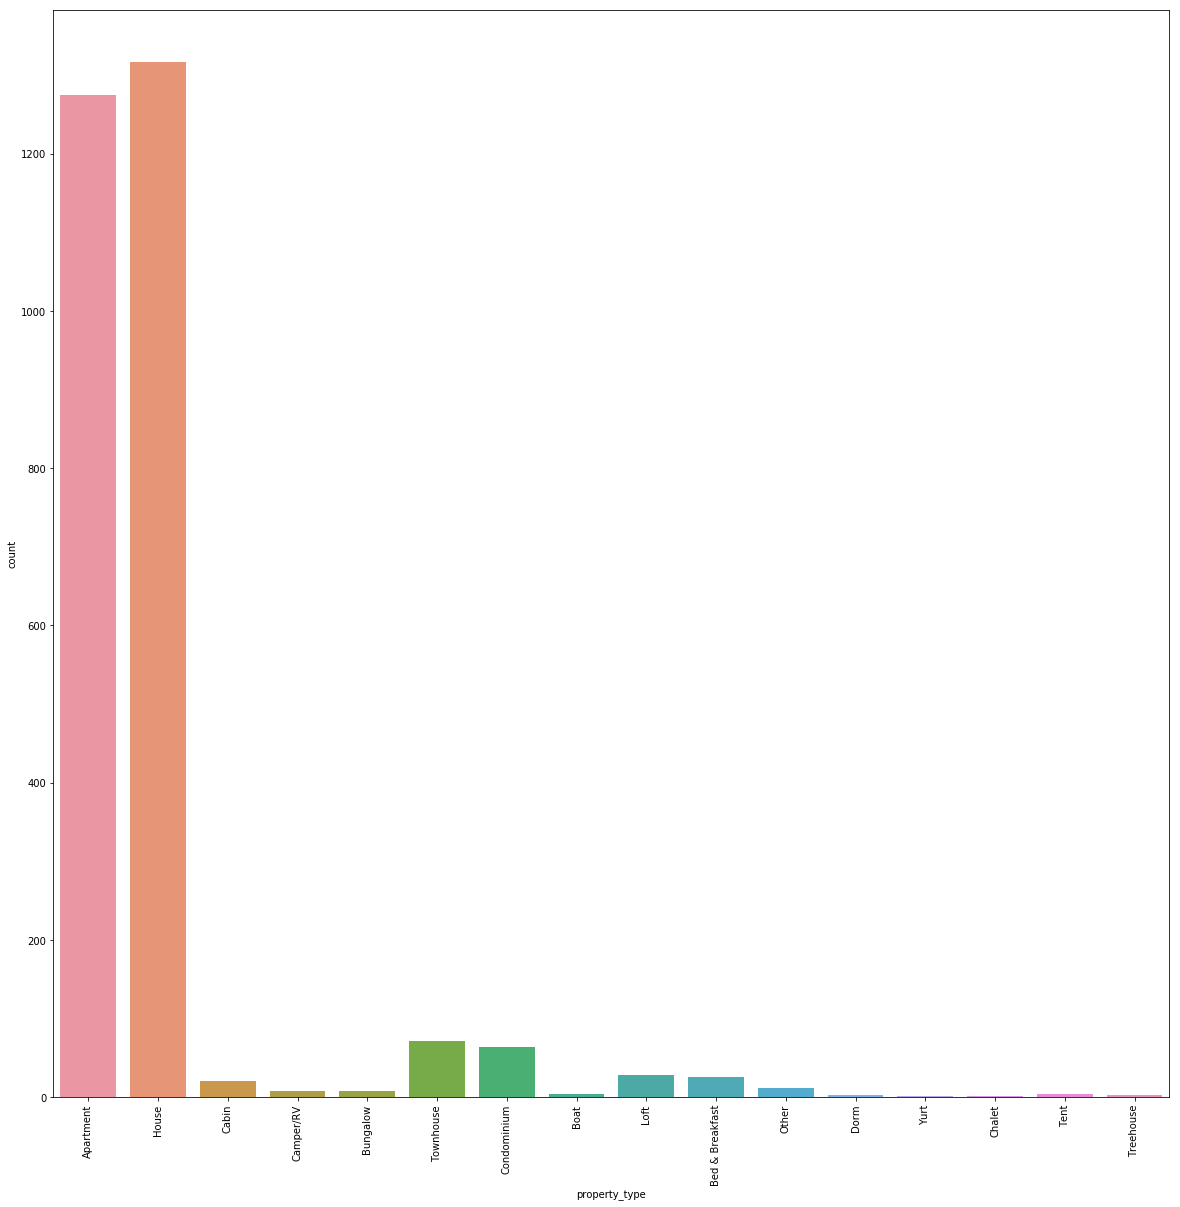

In [10]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.countplot(new_list['property_type'])

A majority of the properties listed are Apartments and Houses which I will focus on later in the analysis.

I will do the same thing for neighbourhood.

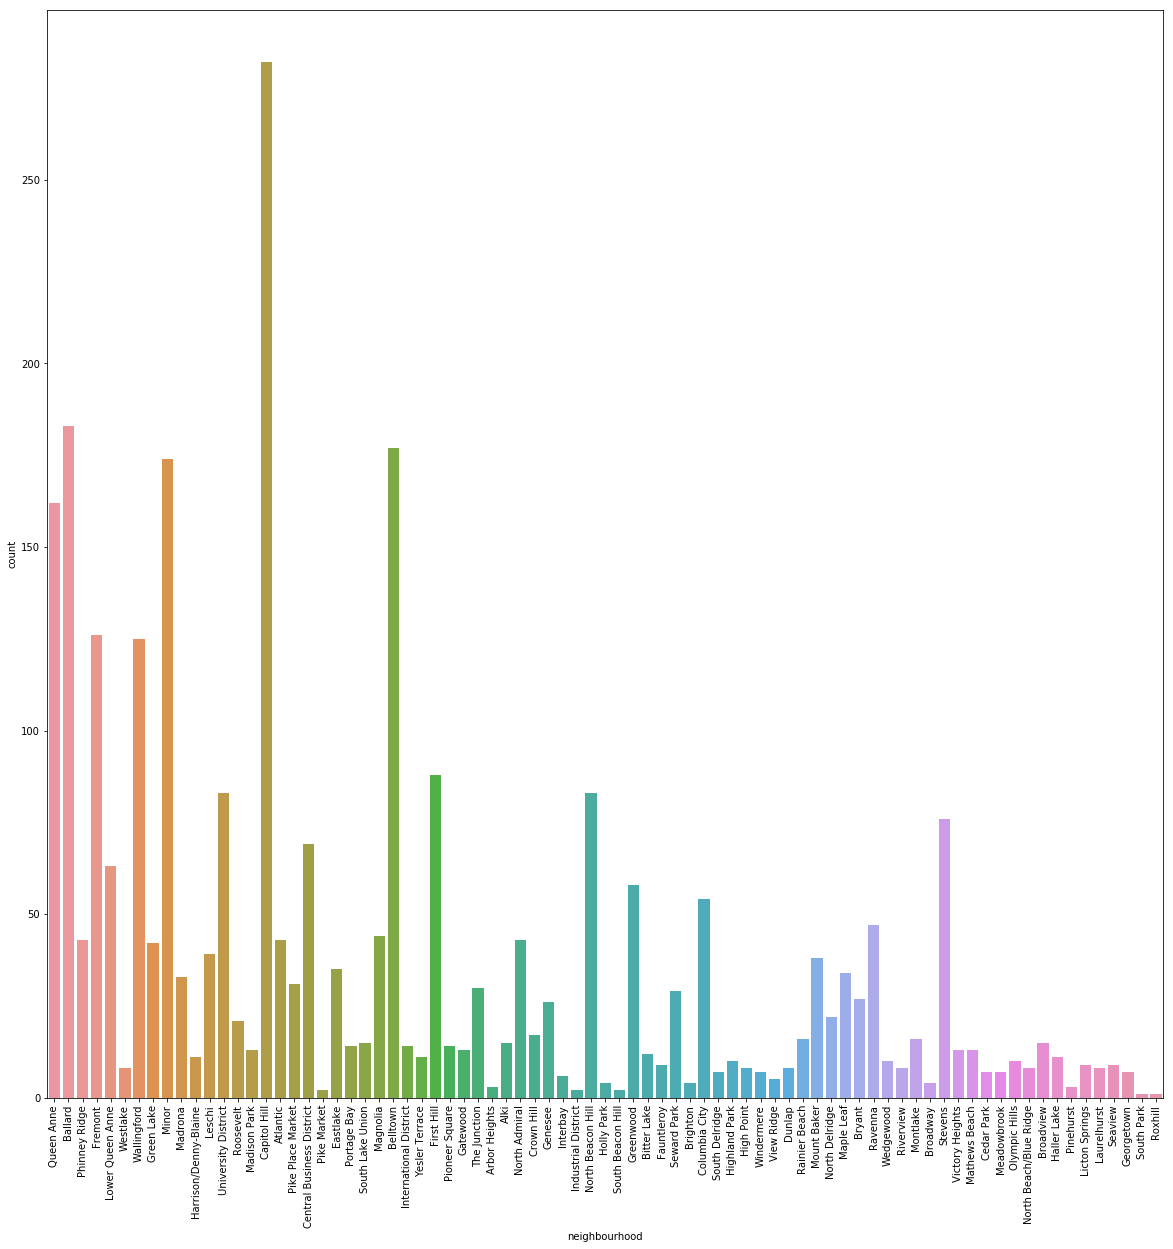

In [11]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
grouped = sns.countplot(new_list['neighbourhood'])


Immediately I see there are a few property types that hold a majority of the dataset and a number of them that represent a very small percentage of the dataset. The same can be said for neighbourhoods. 

new_list.groupby('neighbourhood').nunique() - This gives me 79 unique values for the neighbourhood column.

Therefore, I want to simplify this list to limit the number of features I have while still maintaining the integrity of the data. 

Let's start with grouping the new_list dataset by neighbourhood and counting them up. 

I will then use the nlargest function to give me the top 35 neighbourhoods.

In [12]:
new_list_neighbourhood = new_list.groupby('neighbourhood').count()
new_list_top_15_neighbourhood = new_list_neighbourhood.nlargest(35,'property_type')
new_list_top_15_neighbourhood



,property_type,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
neighbourhood,,,,,,,
Capitol Hill,282,282,282,282,282,282,282
Ballard,183,183,183,183,183,183,183
Belltown,177,177,177,177,177,177,177
Minor,174,174,174,174,174,174,174
Queen Anne,162,162,162,162,162,162,162
Fremont,126,126,126,126,126,126,126
Wallingford,125,125,125,125,125,125,125
First Hill,88,88,88,88,88,88,88
North Beacon Hill,83,83,83,83,83,83,83


I now have a list of the top 35 neighbourhoods that represents about 86.72% of the dataset. I am going to put this in a list that I can use to filter our original dataset and remove the neighbourhoods that hold very little data.

In [13]:
neighbourhood_list = ['Capitol Hill',
'Ballard',
'Belltown',
'Minor',
'Queen Anne',
'Fremont',
'Wallingford',
'First Hill',
'North Beacon Hill',
'University District',
'Stevens',
'Central Business District',
'Lower Queen Anne',
'Greenwood',
'Columbia City',
'Ravenna',
'Magnolia',
'Atlantic',
'North Admiral',
'Phinney Ridge',
'Green Lake',
'Leschi',
'Mount Baker',
'Eastlake',
'Maple Leaf',
'Madrona',
'Pike Place Market',
'The Junction',
'Seward Park',
'Bryant',
'Genesee',
'North Delridge',
'Roosevelt',
'Crown Hill',
'Montlake']

I will use our neighbourhood_list we created (above) and see if our new_list dataset has a value within that list. This will filter out 44 (55.70%) of the unique neighbourhood categories while only removing 13.27% of the data.

I used this youtube tutorial to help on this part. [https://www.youtube.com/watch?v=2AFGPdNn4FM](http://)

In [14]:
#This gives me a list of True/False statements for each row if the value in the neighbourhood columns is in 
#neighbourhood_list above.
true_false_by_neighbourhood = new_list.neighbourhood.isin(neighbourhood_list) 

#I can then put this new list of True/False statements into our origional new_list. This filters new_list down
# to 35 categories of the neighbourhood column while still containing 86.72% of the origional data.
filtered_neighborhood = new_list[true_false_by_neighbourhood]
filtered_neighborhood

,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
0,Apartment,Queen Anne,10.0,1.0,1.0,85.0,-122.371025,47.636289
1,Apartment,Queen Anne,10.0,1.0,1.0,150.0,-122.365666,47.639123
2,House,Queen Anne,10.0,4.5,5.0,975.0,-122.369483,47.629724
4,House,Queen Anne,9.0,2.0,3.0,450.0,-122.372471,47.632918
5,House,Queen Anne,10.0,1.0,1.0,120.0,-122.366174,47.630525
...,...,...,...,...,...,...,...,...
3809,Apartment,Fremont,8.0,1.0,1.0,120.0,-122.343915,47.648689
3810,House,Fremont,8.0,1.0,2.0,154.0,-122.352604,47.654205
3811,Apartment,Fremont,10.0,1.0,1.0,65.0,-122.346692,47.657898
3812,Apartment,Fremont,10.0,1.0,1.0,95.0,-122.358124,47.654516


Let's do the same thing for property_type.

In [15]:
new_list_property_type = new_list.groupby('property_type').count()
new_list_top_16_property_type = new_list_property_type.nlargest(16, 'neighbourhood')
new_list_top_16_property_type




,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
property_type,,,,,,,
House,1317,1317,1317,1317,1317,1317,1317
Apartment,1274,1274,1274,1274,1274,1274,1274
Townhouse,71,71,71,71,71,71,71
Condominium,63,63,63,63,63,63,63
Loft,28,28,28,28,28,28,28
Bed & Breakfast,25,25,25,25,25,25,25
Cabin,20,20,20,20,20,20,20
Other,12,12,12,12,12,12,12
Bungalow,8,8,8,8,8,8,8


Since about 98.55% of property_types are in the top 7. I will just take the top seven of property types for my list:


Now let's clean up the list by property_type.

In [16]:
property_type_list = ['House', 'Apartment', 'Townhouse', 'Condominium', 'Loft', 'Bed & Breakfast', 'Cabin']

In [17]:
#This gives me a list of True/False statements for each row if the value in the property_type column is in 
#the property_type_list above.
true_false_by_property = filtered_neighborhood.property_type.isin(property_type_list) 

#I can then put this new list of True/False statements into our filtered_neighbourhood list. 
#This filters new_list down seven property types while still containing 98.30% of the data of filtered_neighbourhood.
filtered_data = filtered_neighborhood[true_false_by_property]
filtered_data

,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude
0,Apartment,Queen Anne,10.0,1.0,1.0,85.0,-122.371025,47.636289
1,Apartment,Queen Anne,10.0,1.0,1.0,150.0,-122.365666,47.639123
2,House,Queen Anne,10.0,4.5,5.0,975.0,-122.369483,47.629724
4,House,Queen Anne,9.0,2.0,3.0,450.0,-122.372471,47.632918
5,House,Queen Anne,10.0,1.0,1.0,120.0,-122.366174,47.630525
...,...,...,...,...,...,...,...,...
3809,Apartment,Fremont,8.0,1.0,1.0,120.0,-122.343915,47.648689
3810,House,Fremont,8.0,1.0,2.0,154.0,-122.352604,47.654205
3811,Apartment,Fremont,10.0,1.0,1.0,65.0,-122.346692,47.657898
3812,Apartment,Fremont,10.0,1.0,1.0,95.0,-122.358124,47.654516


Our list filtered_data took our new_list and removed the property_types and neighbourhoods that contained very little data. As you can see, we still have 2428 data points from our 2463 points in new_list.

I want to be able to effective measure how expensive each neighbourhood is. I suspect there is a correlation with number of bedrooms listed and price of the property. I will use the below code to plot that. 

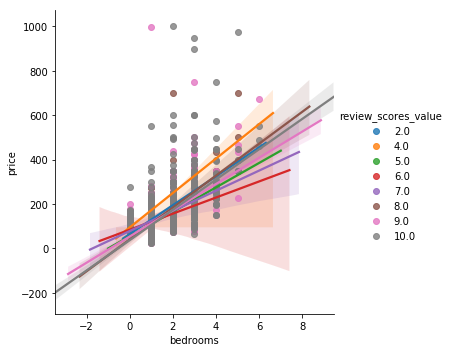

In [18]:
sns.lmplot(data=filtered_data, x='bedrooms', y='price', hue='review_scores_value')

The chart above indicates that there is a correlation with the number of rooms and price. If I want to view how expensive each neighbourhood I will add another column of price/number of rooms. This removes the potential for a neighbourhood to be more "expensive" just because it has a higher number of rooms available than average.

In [19]:
room_premium = (filtered_data.price)/(filtered_data.bedrooms)
filtered_data['Cost Per Bedroom'] = filtered_data['latitude'].add(room_premium)
filtered_data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude,Cost Per Bedroom
0,Apartment,Queen Anne,10.0,1.0,1.0,85.0,-122.371025,47.636289,132.636289
1,Apartment,Queen Anne,10.0,1.0,1.0,150.0,-122.365666,47.639123,197.639123
2,House,Queen Anne,10.0,4.5,5.0,975.0,-122.369483,47.629724,242.629724
4,House,Queen Anne,9.0,2.0,3.0,450.0,-122.372471,47.632918,197.632918
5,House,Queen Anne,10.0,1.0,1.0,120.0,-122.366174,47.630525,167.630525
...,...,...,...,...,...,...,...,...,...
3809,Apartment,Fremont,8.0,1.0,1.0,120.0,-122.343915,47.648689,167.648689
3810,House,Fremont,8.0,1.0,2.0,154.0,-122.352604,47.654205,124.654205
3811,Apartment,Fremont,10.0,1.0,1.0,65.0,-122.346692,47.657898,112.657898
3812,Apartment,Fremont,10.0,1.0,1.0,95.0,-122.358124,47.654516,142.654516


We now have a column at the end that gives the price for a single room.

I'm now going to create a function that allows me to filter out whichever property_type I want while preserving the original data for further analysis. 

In [20]:
def Filterlist(Property, filtered_data):
    property_type = [Property]
    true_false_by_property = filtered_data.property_type.isin(property_type) 
    List = filtered_data[true_false_by_property]
    return List



I am going to use this Filterlist function to filter by 'House' and run some analysis on that section of the data. 

In [21]:
House_list = Filterlist('House', filtered_data)
House_list

,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude,Cost Per Bedroom
2,House,Queen Anne,10.0,4.5,5.0,975.0,-122.369483,47.629724,242.629724
4,House,Queen Anne,9.0,2.0,3.0,450.0,-122.372471,47.632918,197.632918
5,House,Queen Anne,10.0,1.0,1.0,120.0,-122.366174,47.630525,167.630525
6,House,Queen Anne,10.0,1.0,1.0,80.0,-122.368519,47.636605,127.636605
10,House,Queen Anne,10.0,1.0,1.0,95.0,-122.358478,47.635482,142.635482
...,...,...,...,...,...,...,...,...,...
3803,House,Fremont,10.0,3.5,4.0,250.0,-122.349238,47.661131,110.161131
3806,House,Fremont,10.0,1.0,2.0,160.0,-122.354514,47.656057,127.656057
3808,House,Fremont,9.0,2.0,3.0,175.0,-122.350485,47.662036,105.995370
3810,House,Fremont,8.0,1.0,2.0,154.0,-122.352604,47.654205,124.654205


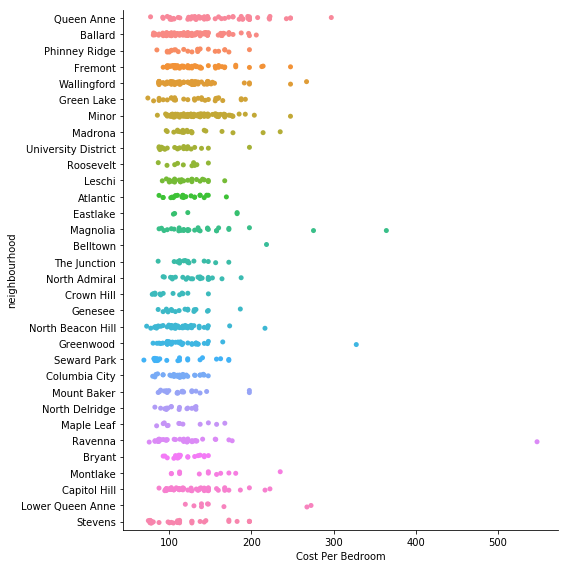

In [22]:
sns.catplot(x='Cost Per Bedroom', y='neighbourhood', data=House_list, height=8)

In [23]:
Apartment_list = Filterlist('Apartment', filtered_data)
Apartment_list

,property_type,neighbourhood,review_scores_value,bathrooms,bedrooms,price,longitude,latitude,Cost Per Bedroom
0,Apartment,Queen Anne,10.0,1.0,1.0,85.0,-122.371025,47.636289,132.636289
1,Apartment,Queen Anne,10.0,1.0,1.0,150.0,-122.365666,47.639123,197.639123
8,Apartment,Queen Anne,10.0,1.0,1.0,90.0,-122.357216,47.632410,137.632410
9,Apartment,Queen Anne,9.0,1.0,1.0,150.0,-122.366889,47.637492,197.637492
16,Apartment,Queen Anne,9.0,1.0,1.0,66.0,-122.366602,47.626200,113.626200
...,...,...,...,...,...,...,...,...,...
3805,Apartment,Fremont,10.0,1.0,2.0,100.0,-122.356285,47.653158,97.653158
3807,Apartment,Wallingford,9.0,1.0,0.0,109.0,-122.342720,47.654304,inf
3809,Apartment,Fremont,8.0,1.0,1.0,120.0,-122.343915,47.648689,167.648689
3811,Apartment,Fremont,10.0,1.0,1.0,65.0,-122.346692,47.657898,112.657898


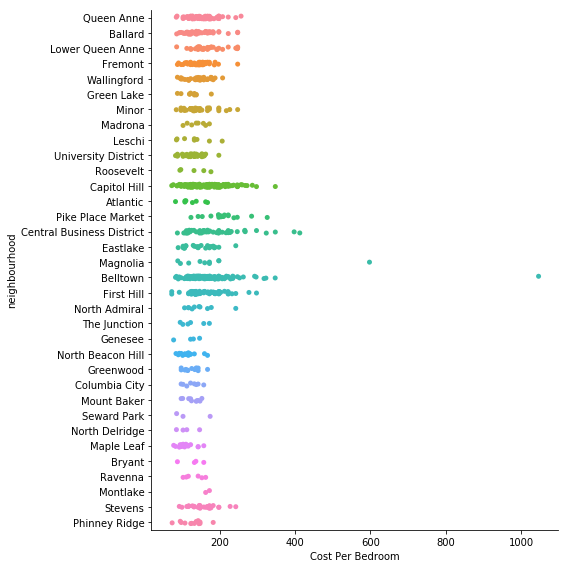

In [24]:
sns.catplot(x='Cost Per Bedroom', y='neighbourhood', data=Apartment_list, height=8)


It seems that there is much more varability in terms of price for houses depending on the neighbourhood.

Queen Anne, Ballard, Minor, Capitol Hill, and Stevens looked among the pricer neighbourhoods. However, that is debatable since the varability is so high.

For Apartments there is less varability in the price per room. 

Queen Anne, Ballard, Lower Queen Anne, Minor, Capitol Hill, Pike Place Market, Central Business District, Belltown, and Firsthill ranked among the most expensive. 

I noticed some districts appeared in the Apartment_list that were not amoung the House_list. I am going to plot the points on a map using each AirBnB latitiude and longitude coordinates and compare the two lists.

I used this YouTube tutorial to learn about folium. I tried basemap and geopandas first but ran into issues with my system. [https://www.youtube.com/watch?v=4RnU5qKTfYY&t=796s](http://)

**Map of Houses**

In [25]:
from folium.plugins import MarkerCluster

#Creates a map of Seattle.
m = folium.Map(location=[47.60, -122.24], zoom_start = 11)
m.save('index.html')


#Takes the latitude and longitude coordinates and zips them into a form to be plotted.
lat = pd.to_numeric(House_list['latitude'], errors = 'coerce')
lon = pd.to_numeric(House_list['longitude'], errors = 'coerce')

#Zip togethers each list of latitude and longitude coordinates. 
result = zip(lat,lon)
lat_lon = list(result)


mc = MarkerCluster().add_to(m)
for i in range(0,len(House_list)):
    folium.Marker(location=lat_lon[i]).add_to(mc)

m.save('index.html')
m

**Map of Apartments**

In [26]:
from folium.plugins import MarkerCluster

#Creates a map of Seattle.
m = folium.Map(location=[47.60, -122.24], zoom_start = 11)
m.save('index.html')


#Takes the latitude and longitude coordinates and zips them into a form to be plotted.
lat = pd.to_numeric(Apartment_list['latitude'], errors = 'coerce')
lon = pd.to_numeric(Apartment_list['longitude'], errors = 'coerce')

#Zip togethers each list of latitude and longitude coordinates. 
result = zip(lat,lon)
lat_lon = list(result)



mc = MarkerCluster().add_to(m)
for i in range(0,len(Apartment_list)):
    folium.Marker(location=lat_lon[i]).add_to(mc)
m.save('index.html')
m

Comparing the two maps it looks to be that Apartments are clustered around central Seattle (Neighbourhood: Belltown) while Houses are more dispersed up north (Neighbourhoods: Ballard, Fremont, and Madrona). This can explain the variability in terms of price per room since Apartments are clustered in one area and houses are dispersed throughout Seattle. 

In addition, the maps above indicate areas of high AirBnB listings which imply high AirBnB demand. However there are many areas close to high density AirBnB clusters that have little AirBnB's avaliable. My next step would be to create a model to predict prices depending on the features listed in this analysis and compare that to the areas that have few AirBnB rentals but have a high predicted listing price based on their proxity to current listings. We can then run further analysis to see if there are opportunities to promote more AirBnB listings there and updating our models to obtain live data from the AirBnB API's. 

I wanted to thank the Kaggle community and my mentors for providing me this opportunity to learn. I just started my Data Science journey a couple of weeks ago and everything I used in this analysis I had to scourge StackOverFlow and YouTube tutorials (while repeatedly banging my head over my keyboard). I would greatly appreciate any suggestions or helpful tips on what to learn next and improve upon. Thank you.


****